In [17]:
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats

import plotly.graph_objects as go
sns.set_context('paper', font_scale=1.4)

%matplotlib inline

In [19]:
time_series = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv',
                          parse_dates=[0], dtype={'location': 'category'})

print("{} rows \n{} countries\nfrom {} to {}".format(len(time_series), 
                                                         time_series['location'].nunique(),
                                                         time_series['date'].min(),
                                                         time_series['date'].max()))
time_series.sample(5)

18345 rows 
211 countries
from 2019-12-31 00:00:00 to 2020-05-20 00:00:00


,date,location,new_cases,new_deaths,total_cases,total_deaths
9215,2020-04-14,Kosovo,15,1,377,8
935,2020-03-21,Australia,165,1,874,7
6583,2020-04-19,Gibraltar,0,0,133,0
4981,2020-04-07,Ecuador,101,11,3747,191
6996,2020-05-11,Guatemala,85,2,1052,26


In [20]:
countries = pd.DataFrame(columns=['location', 'total_cases', 'total_deaths'])
countries['location'] = time_series['location'].unique()
countries['total_cases'] = time_series.groupby('location')['total_cases'].max().values
countries['total_deaths'] = time_series.groupby('location')['total_deaths'].max().values
countries.head()

,location,total_cases,total_deaths
0,Afghanistan,7653,178
1,Albania,949,31
2,Algeria,7377,561
3,Andorra,761,51
4,Angola,50,2


[World, United States, Russia, Brazil, United Kingdom, ..., British Virgin Islands, Western Sahara, Bonaire Sint Eustatius and Saba, Anguilla, Lesotho]
Length: 211
Categories (211, object): [Afghanistan, Albania, Algeria, Andorra, ..., World, Yemen, Zambia, Zimbabwe]


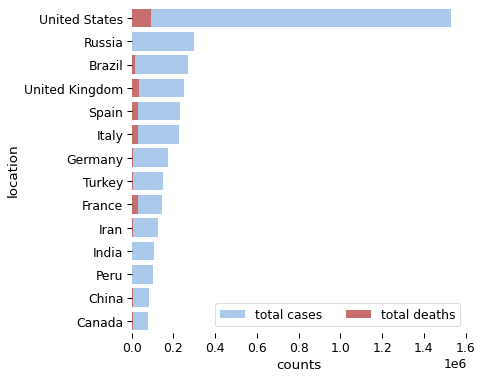

In [21]:
n = 15  # top n

## get locations sorted
sorted_cases = countries['total_cases'].sort_values(ascending=False)
sorted_cases_locs = countries.loc[sorted_cases.index]['location'].values
print(sorted_cases_locs)
f, ax = plt.subplots(figsize = (6,6))

sns.set_color_codes('pastel')
sns.barplot(x='total_cases', y='location', data=countries, order=sorted_cases_locs[1:n],
           label='total cases', color='b')

sns.set_color_codes('muted')
sns.barplot(x='total_deaths', y='location', data=countries, order=sorted_cases_locs[1:n],
           label='total deaths', color='r')

ax.set_xlabel('counts')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)